<center>
 <h1 style="color:black">PWD2016 dataset EDA</h1> 
    </center>


<b> Libraries used in this file: </b>

<ul>
<li> pandas
<li> seaborn
<li> matplotlib.pyplot
</ul>
<p>
To Execute this file, you will need to download <i>PhishIntention_phish.parquet </i>and <i>PhishIntention_legit.parquet</i> from <a href = https://drive.google.com/drive/folders/1IWip7RW_p8iISYMAT-Db_pFIp4BWb_sn?usp=share_link ><font size="+2">Here!</font></a> 
    <br>(Don't forget to adjust the parquet file paths in the code)   
</p>
    

<a id='home' /> 
<h2> Content: </h2><br>
<a href=#phish><h3>1. Phishing Class Data Exploration</h3></a>
<ul>
    <li><a href=#1>1.1 Reading Phish Parquet file</a></li>
    <li><a href=#2>1.2 Missing Data</a></li>
    <li><a href=#3>1.3 Average Text Length</a></li>
    <li><a href=#4>1.4 Phish Brand Distribution</a></li>
    <li><a href=#5>1.5 Detected Text Languages</a></li>
    <li><a href=#6>1.6 SSL Distribution</a></li>
    <li><a href=#7>1.7 Top 10 TLD & Domains</a></li>
    <li><a href=#8>1.8 URL Length Stats</a></li>
    <li><a href=#9>1.9 Top 10 FLD & Subdomains</a></li>
</ul>

<a href=#legit><h3>2. Legitimate Class Data Exploration</h3></a>
<ul>
    <li><a href=#11>2.1 Reading Legit Parquet file</a></li>
    <li><a href=#22>2.2 Missing Data</a></li>
    <li><a href=#33>2.3 Average Text Length</a></li>
    <li><a href=#44>2.4 Legit Brand Distribution</a></li>
    <li><a href=#55>2.5 Detected Text Languages</a></li>
    <li><a href=#66>2.6 SSL Distribution</a></li>
    <li><a href=#77>2.7 Top 10 TLD & Domains</a></li>
    <li><a href=#88>2.8 URL Length Stats</a></li>
    <li><a href=#99>2.9 Top 10 FLD & Subdomains</a></li>
</ul>

<hr></hr>
<hr></hr>

  <a id='phish' /> 
  <center>
  <h3 id="phish-samples" style="color:red">1. Phish samples</h2>
    </center>

In [1]:
import pandas as pd

<a id='1' /> 
<h2>1.1 Reading Phish parquet file</h2>

In [2]:
%%time
phish_samples = pd.read_parquet('PWD2016_phish.parquet')

CPU times: total: 938 ms
Wall time: 880 ms


In [3]:
phish_samples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 15000 to 29999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dataset_name                 15000 non-null  object
 1   folder_name                  15000 non-null  object
 2   Class                        15000 non-null  object
 3   brand                        15000 non-null  object
 4   URL                          14998 non-null  object
 5   TLD                          14908 non-null  object
 6   Domain                       14908 non-null  object
 7   FLD                          14908 non-null  object
 8   Subdomain                    6977 non-null   object
 9   SSL                          14998 non-null  object
 10  image_path                   14412 non-null  object
 11  trafilatura_text             12201 non-null  object
 12  trafilatura_text_language    12172 non-null  object
 13  BeautifulSoup_text         

In [4]:
phish_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,15000,15000,15000,15000,14998,14908,14908,14908,6977,14998,14412,12201,12172,12302,12269,0,12211,12252,13685,13640
unique,1,15000,1,1,5737,209,2656,2676,410,2,14412,1302,35,1538,36,0,1541,1453,2337,20
top,PWD2016,P00001,phish,unknown,http://weryfikacja-centrum24.top/?email=abuse@...,com,sweddy,sweddy.com,www,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Welcome to Google Docs. Upload and Share Your ...,English,\n\n\n\nGoogle Docs\n\n\n\n\n\n\n\n\n\n\n\n\n\...,English,NaN,"\n \n \n \n Google Docs\n\n html, body {\n...",Google Docs\n\nWelcome to Google Docs. Upload ...,"﻿ \n\n\n<!DOCTYPE html>\n<html lang=""en"">\n <...",English
freq,15000,1,15000,15000,6,6875,131,131,5209,14768,1,1491,8450,1477,8501,NaN,1548,1491,940,12916


In [5]:
# showing the first 10 samples in the dataframe
phish_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
15000,PWD2016,P00001,phish,unknown,http://sydneyin.com.au/wp-content/themes/s/ind...,com.au,sydneyin,sydneyin.com.au,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,"USAA Military Home, Life & Auto Insurance USAA...",English,"\n\nUSAA Military Home, Life & Auto Insurance\...",English,None,"\n\nUSAA Military Home, Life & Auto Insurance\...","USAA Military Home, Life & Auto Insurance\n\nU...",<?php\nrequire_once 'block.php';\n?>\n\n<html>...,English
15001,PWD2016,P00002,phish,unknown,http://spis.org.pl/Prezentacje-Seminarium/ent_...,org.pl,spis,spis.org.pl,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,"Please Logon to your online ID, password and P...",English,\n\n\nLog On to usaa.com | USAA\n\n\n\n\n\n\n\...,English,None,\n\n\n\t\n\n\n \n\n\nLog On to usaa.com | U...,Log On to usaa.com | USAA\n\nSkip to Content\n...,"\n\n\n\n<!DOCTYPE html PUBLIC ""-//W3C//DTD XH...",English
15002,PWD2016,P00003,phish,unknown,http://sindimetalmaringa.com.br/wp-admins/secu...,com.br,sindimetalmaringa,sindimetalmaringa.com.br,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,"For auto insurance, free checking, credit card...",English,\n\n\n\n\n\nUSAA / Welcome to USAA\n\n\n\n\n\n...,English,None,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,USAA / Welcome to USAA\n\nSkip to Content\nPro...,\n\n\n \n\n\n\n\n\n\n \n \n \n \n ...,English
15003,PWD2016,P00004,phish,unknown,http://www.escortsx.co.za/~travelv/wp-content/...,co.za,escortsx,escortsx.co.za,www,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,"For auto insurance, free checking, credit card...",English,\n\n\n\n\nUSAA / Welcome to USAA\n\n\n\n\n\n\n...,English,None,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n...,USAA / Welcome to USAA\n\nSkip to Content\nPro...,"﻿<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 ...",English
15004,PWD2016,P00005,phish,unknown,http://freestyle4ad0.myjino.ru/USAA-Online.htm,myjino.ru,freestyle4ad0,freestyle4ad0.myjino.ru,freestyle4ad0,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,We've detected that your internet connection m...,English,\n\n\n\n\nUSAA / Welcome to USAA\n\n\n\n\n\n\n...,English,None,\n\n\n\n\n\n\n\n\n\n\n\t\n\n\n\t\n\t\n\n\n\t\n...,USAA / Welcome to USAA\n\nSkip to Content\n\nU...,<?php\n$username = $_POST['username'];\n$passw...,English
15005,PWD2016,P00006,phish,unknown,http://agenciaib.com/wp-content/themes/aol/aol...,com,agenciaib,agenciaib.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Whoops...\nSign-in to this site requires JavaS...,English,"\n\n\nAOL Mail: Simple, Free, Fun\n\n\n\n\n\n\...",English,None,"\n\t\n\t\t\n\t\t\n\t\t\tAOL Mail: Simple, Free...","AOL Mail: Simple, Free, Fun\n\nWhoops... Sign-...",\n\n\n\n\n\n\n<!doctype html>\n\n\n\n\n\n\n<ht...,English
15006,PWD2016,P00007,phish,unknown,http://ateamhvacnj.com/components/com_tags/855...,com,ateamhvacnj,ateamhvacnj.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,"Parse error: syntax error, unexpected T_FUNCTI...",English,"\nParse error: syntax error, unexpected T_FUN...",English,None,"\nParse error: syntax error, unexpected T_FUN...","Parse error: syntax error, unexpected T_FUNCTI...","<br />\n<b>Parse error</b>: syntax error, une...",English
15007,PWD2016,P00008,phish,unknown,http://www.usaa.com-secure.onlinebanking-acces...,com,eptechit,eptechit.com,www.usaa.com-secure.onlinebanking-access.accou...,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,We've upgraded your protection on usaa.com and...,English,\n\n\nUSAA / Check Your Security Information\n...,English,None,\n\n\t\t\n\t\t\n\t\tUSAA / Check Your Security...,USAA / Check Your Security Information\n\nSkip...,"<!DOCTYPE HTML>\n<html xmlns=""http://www.w3.or...",English
15008,PWD2016,P0

In [6]:
# showing the last 10 samples in the dataframe
phish_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
29990,PWD2016,P08991,phish,unknown,http://www.lalal.info/direct/aHR0cHM6Ly93d3cuZ...,info,lalal,lalal.info,www,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,None,None,None,None,None,None,None,None,None
29991,PWD2016,P08992,phish,unknown,http://milangardeninn.com/script/data/deab7ec9...,com,milangardeninn,milangardeninn.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Welcome to Google Docs. Upload and Share Your ...,Portuguese,\n\n\n\nGoogle Docs\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Portuguese,None,"\n \n \n \n Google Docs\n\n html, body {\n...",Google Docs\n\nWelcome to Google Docs. Upload ...,"﻿ \n\n\n<!DOCTYPE html>\n<html lang=""en"">\n <...",English
29992,PWD2016,P08993,phish,unknown,http://milangardeninn.com/script/data/deab7ec9...,com,milangardeninn,milangardeninn.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Welcome to Google Docs. Upload and Share Your ...,Portuguese,\n\n\n\nGoogle Docs\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Portuguese,None,"\n \n \n \n Google Docs\n\n html, body {\n...",Google Docs\n\nWelcome to Google Docs. Upload ...,"﻿ \n\n\n<!DOCTYPE html>\n<html lang=""en"">\n <...",English
29993,PWD2016,P08994,phish,unknown,http://kanak-international.com/farfetch/,com,kanak-international,kanak-international.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Welcome to Google Docs. Upload and Share Your ...,Portuguese,\n\n\n\nGoogle Docs\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Portuguese,None,"\n \n \n \n Google Docs\n\n html, body {\n...",Google Docs\n\nWelcome to Google Docs. Upload ...,﻿ \n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=...,English
29994,PWD2016,P08995,phish,unknown,http://www.radionovigrad.net/kizzok/Gssss/Gsss...,net,radionovigrad,radionovigrad.net,www,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Welcome to Google Docs. Upload and Share Your ...,Portuguese,\n\n\n\nGoogle Docs\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Portuguese,None,"\n \n \n \n Google Docs\n\n html, body {\n...",Google Docs\n\nWelcome to Google Docs. Upload ...,"﻿ \n\n\n<!DOCTYPE html>\n<html lang=""en"">\n <...",English
29995,PWD2016,P08996,phish,unknown,http://texascougar.com/admin/aol.html?utm_sour...,com,texascougar,texascougar.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Whoops...\nSign-in to this site requires JavaS...,English,"\n\n\nAOL Mail: Simple, Free, Fun\n\n\n\n\n\n\...",English,None,"\n\t\n\n\t\t\n\t\t\n\t\t\tAOL Mail: Simple, Fr...","AOL Mail: Simple, Free, Fun\n\nWhoops... Sign-...",\n\n\n\n\n\n<!doctype html>\n\n\n\n\n\n\n<html...,English
29996,PWD2016,P08997,phish,unknown,http://discus-serbia.com/mailaol.com.htm,com,discus-serbia,discus-serbia.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Whoops...\nSign-in to this site requires JavaS...,English,"\n\n\nAOL Mail: Simple, Free, Fun\n\n\n\n\n\n\...",English,None,"\n\t\n\t\t\n\t\t\n\t\t\tAOL Mail: Simple, Free...","AOL Mail: Simple, Free, Fun\n\nWhoops... Sign-...",\n\n\n\n\n\n\n<!doctype html>\n\n\n\n\n\n\n<ht...,English
29997,PWD2016,P08998,phish,unknown,http://xenanghpm.com/images/stories/USAA/,com,xenanghpm,xenanghpm.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Văn Phòng Đà Nẵng:\nSale: Ms.Phương\nHotline :...,Vietnamese,"\n\n\n\n\n\nXe Nâng , Xe Nang, Bán xe nâng TTB...",Vietnamese,None,"\n\n\n\n \n \n Xe Nâng , Xe Nang, Bán x...","Xe Nâng , Xe Nang, Bán xe nâng TTBK\n\nXE NÂNG...",\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\n\n\t\t\t\t...,English
29998,PWD2016,P08999,phish,unknown,http://domaineparcolympique.net/zpss/Aol/Aol.html,net,domaineparcolympique,domaineparcolympique.net,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Whoops...\nSign-in to this site requires JavaS...,English,"\n\n\nAOL Mail: Simple, Free, Fun\n\n\n\n\n

<hr></hr>

<a id='2' /> 
<h2>1.2 Missing Data</h2>

In [7]:
print('the number of missing HTML files (phish):', sum(phish_samples.full_html.isnull()))
print('the number of missing URLs (phish):', sum(phish_samples.URL.isnull()))
print('the number of missing images (phish):', sum(phish_samples.image_path.isnull()))

the number of missing HTML files (phish): 1315
the number of missing URLs (phish): 2
the number of missing images (phish): 588


<hr></hr>

<a id='3' /> 
<h2>1.3 Average Text Length</h2>

In [8]:
print('the average phish HTML code text length:', round(phish_samples.full_html.str.len().sum() / sum(phish_samples.full_html.notnull()), 1))
print('the average phish trafilatura text length:', round((phish_samples.trafilatura_text.str.len().sum() / sum(phish_samples.trafilatura_text.notnull())),1))
print('the average phish BeautifulSoup text length:', round(phish_samples.BeautifulSoup_text.str.len().sum() / sum(phish_samples.BeautifulSoup_text.notnull()), 1))
print('the average phish html2text text length: NAN (Division by Zero)') # round(phish_samples.html2text_text.str.len().sum() / sum(phish_samples.html2text_text.notnull()), 1)
print('the average phish html_extract text length:', round(phish_samples.html_extract_text.str.len().sum() / sum(phish_samples.html_extract_text.notnull()), 1))
print('the average phish lxml_text text length:', round(phish_samples.lxml_text.str.len().sum() / sum(phish_samples.lxml_text.notnull()), 1))



the average phish HTML code text length: 28859.0
the average phish trafilatura text length: 1065.3
the average phish BeautifulSoup text length: 2137.9
the average phish html2text text length: NAN (Division by Zero)
the average phish html_extract text length: 1858.0
the average phish lxml_text text length: 9507.6


<hr></hr>

<a id='4' /> 
<h2>1.4 Phish Brand Distribution</h2>


In [9]:
#there are no phishing targeted brand data for phish samples in PWD2016 dataset
phish_samples.brand.value_counts()

unknown    15000
Name: brand, dtype: int64

<hr></hr>

<a id='5' /> 
<h2>1.5 Detected Text Languages</h2>

In [10]:
trafilatura_langs_phish = phish_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_phish[:10]

English               8450
Portuguese            2041
French                 452
Italian                148
Russian                133
Spanish; Castilian     120
Danish                 105
Tagalog                 89
German                  88
Polish                  71
Name: trafilatura_text_language, dtype: int64

In [11]:
print('The total number of phishing languages (Trafilatura): ', len(trafilatura_langs_phish))

The total number of phishing languages (Trafilatura):  35


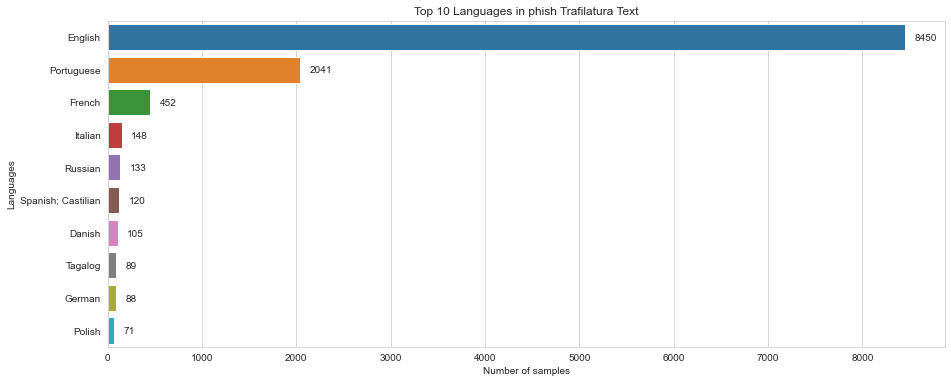

In [12]:
#ploting the types and their counts
import seaborn as sns
import matplotlib.pyplot as plt

langs = trafilatura_langs_phish[:10].index
values = trafilatura_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish Trafilatura Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [13]:
BeautifulSoup_langs_phish = phish_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_phish[:10]

English               8501
Portuguese            2065
French                 452
Italian                140
Russian                133
Estonian               126
Spanish; Castilian     124
Danish                 109
Tagalog                 96
German                  72
Name: BeautifulSoup_text_language, dtype: int64

In [14]:
print('The total number of phishing languages (BS): ', len(BeautifulSoup_langs_phish))

The total number of phishing languages (BS):  36


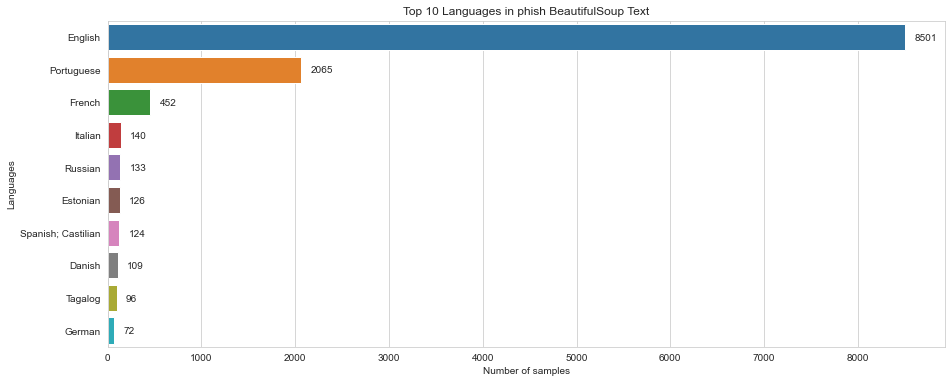

In [15]:
langs = BeautifulSoup_langs_phish[:10].index
values = BeautifulSoup_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish BeautifulSoup Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


In [16]:
html_langs_phish = phish_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_phish[:10]

English                          12916
Polish                             254
French                             202
Catalan; Valencian                  81
Portuguese                          48
Italian                             39
Romanian; Moldavian; Moldovan       17
German                              14
Croatian                            14
Hungarian                           14
Name: html_text_language, dtype: int64

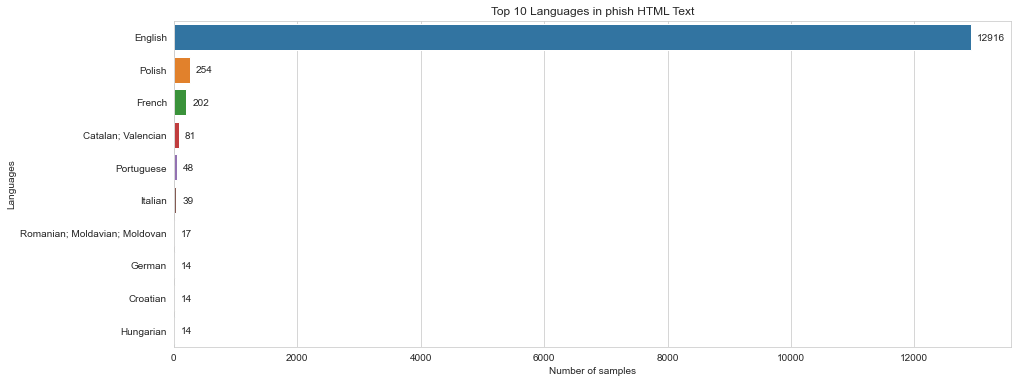

In [17]:
langs = html_langs_phish[:10].index
values = html_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='6' /> 
<h2>1.6 SSL Distribution</h2>

In [18]:
phish_samples.SSL.value_counts()

False    14768
True       230
Name: SSL, dtype: int64

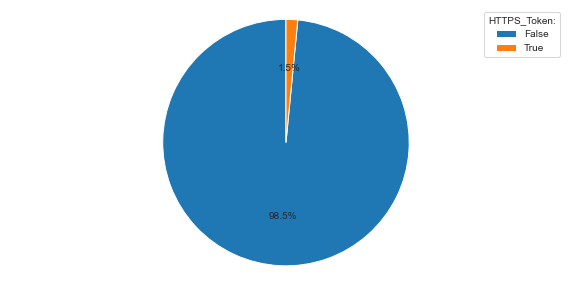

In [19]:
# Plot the categories of the disease column
sizes = phish_samples.SSL.value_counts().values #sizes of the slides
labels= phish_samples.SSL.value_counts().index #labels with the diseases names
fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='7' /> 
<h2>1.7 Top 10 TLD & Domains</h2>

In [20]:
phish_samples.Domain.value_counts()[:10]

sweddy             131
gtllc               98
evark               95
monteshouse         72
shobiziems          65
bronze-jewelry      64
usa                 62
bmwclubavto         56
easvarahospital     56
modernyear          53
Name: Domain, dtype: int64

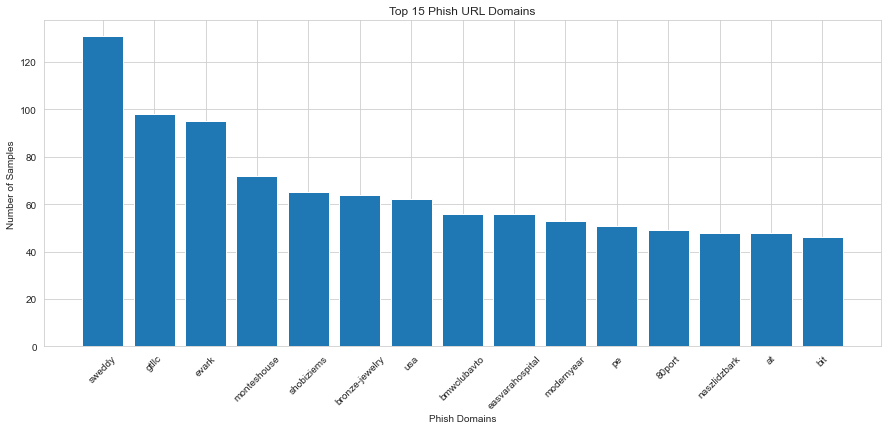

In [21]:
domains = phish_samples.Domain.value_counts()[:15].index
counts = phish_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Phish Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [22]:
phish_samples.TLD.value_counts()[:10]

com       6875
com.br    1207
org        634
net        506
pl         484
com.au     477
ru         331
in         297
it         234
info       175
Name: TLD, dtype: int64

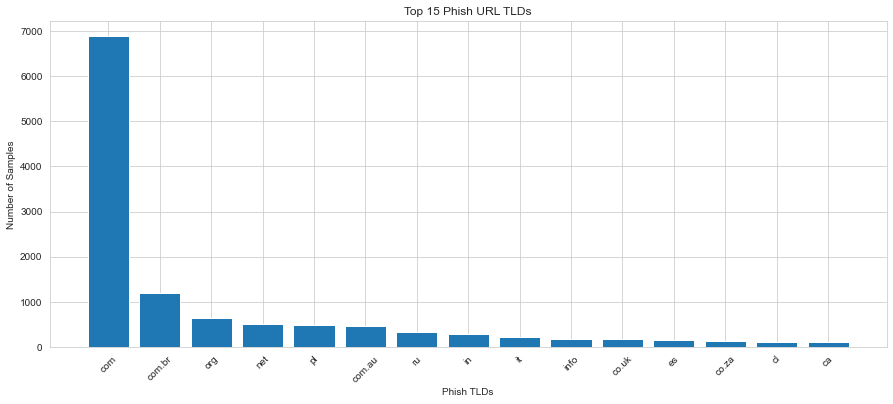

In [23]:
tlds = phish_samples.TLD.value_counts()[:15].index
counts = phish_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Phish TLDs")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='8' /> 
<h2>1.8 URL Length Stats</h2>

In [24]:
print('Phish URL average length:', round(phish_samples.URL.str.len().sum()/sum(phish_samples.URL.notnull()), 4))
print('Phish URL min length:', phish_samples.URL.str.len().min())
print('Phish URL max length:', phish_samples.URL.str.len().max())
print('Phish URL median length:', phish_samples.URL.str.len().median())

Phish URL average length: 74.1372
Phish URL min length: 18.0
Phish URL max length: 952.0
Phish URL median length: 57.0


<hr></hr>

<a id='9' /> 
<h2>1.9 Top 10 FLD & Subdomains</h2>

In [25]:
phish_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
15000,http://sydneyin.com.au/wp-content/themes/s/ind...,com.au,sydneyin,sydneyin.com.au,None
15001,http://spis.org.pl/Prezentacje-Seminarium/ent_...,org.pl,spis,spis.org.pl,None
15002,http://sindimetalmaringa.com.br/wp-admins/secu...,com.br,sindimetalmaringa,sindimetalmaringa.com.br,None
15003,http://www.escortsx.co.za/~travelv/wp-content/...,co.za,escortsx,escortsx.co.za,www
15004,http://freestyle4ad0.myjino.ru/USAA-Online.htm,myjino.ru,freestyle4ad0,freestyle4ad0.myjino.ru,freestyle4ad0
15005,http://agenciaib.com/wp-content/themes/aol/aol...,com,agenciaib,agenciaib.com,None
15006,http://ateamhvacnj.com/components/com_tags/855...,com,ateamhvacnj,ateamhvacnj.com,None
15007,http://www.usaa.com-secure.onlinebanking-acces...,com,eptechit,eptechit.com,www.usaa.com-secure.onlinebanking-access.accou...
15008,http://evark.in/47/Banco-Pichincha/Banco-Pichi...,in,evark,evark.in,None
15009,http://kidsplanet.cz/modules/Zone1/,cz,kidsplanet,kidsplanet.cz,None


In [26]:
print('the number of unique flds:', len(phish_samples.FLD.unique()))
phish_samples.FLD.value_counts()[:15]

the number of unique flds: 2677


sweddy.com             131
gtllc.com               98
evark.in                95
monteshouse.com         72
bronze-jewelry.com      64
usa.cc                  62
bmwclubavto.ru          56
easvarahospital.com     56
modernyear.com          53
pe.hu                   51
shobiziems.com          49
80port.net              49
at.ua                   48
naszlidzbark.pl         48
rhoster.com.br          45
Name: FLD, dtype: int64

In [27]:
print('the number of unique subdomains:', len(phish_samples.Subdomain.unique()))
phish_samples.Subdomain.value_counts()[:15]

the number of unique subdomains: 411


www                                            5209
service-paypal-information                      172
www.service-paypal-information                   57
living4u                                         49
mail                                             19
hosting5358473                                   19
www.demo                                         18
unlockyourvideofb4                               18
docs                                             18
web                                              14
ke                                               12
supportinfo-page-service05                       12
dl                                               11
accentapllogininfoapp                            10
myaccount.signinpaypal.com.it.home.settings       9
Name: Subdomain, dtype: int64

In [28]:
phish_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,14998,14908,14908,14908,6977
unique,5737,209,2656,2676,410
top,http://weryfikacja-centrum24.top/?email=abuse@...,com,sweddy,sweddy.com,www
freq,6,6875,131,131,5209


<hr></hr>

<hr></hr>

<a id='legit' /> 
<center>
  <h2 id="legit-samples" style="color:red">2. Legit samples</h2>
</center>


<a id='11' /> 
<h2>2.1 Reading Legit parquet file</h2>

In [29]:
%%time
legit_samples = pd.read_parquet('PWD2016_legit.parquet')

CPU times: total: 8.78 s
Wall time: 7.73 s


In [30]:
legit_samples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dataset_name                 15000 non-null  object
 1   folder_name                  15000 non-null  object
 2   Class                        15000 non-null  object
 3   brand                        15000 non-null  object
 4   URL                          14999 non-null  object
 5   TLD                          14998 non-null  object
 6   Domain                       14998 non-null  object
 7   FLD                          14998 non-null  object
 8   Subdomain                    99 non-null     object
 9   SSL                          14999 non-null  object
 10  image_path                   14602 non-null  object
 11  trafilatura_text             14274 non-null  object
 12  trafilatura_text_language    13600 non-null  object
 13  BeautifulSoup_text           14

In [31]:
legit_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
0,PWD2016,L11001,legit,unknown,juiceads.net,net,juiceads,juiceads.net,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,JuiceADS.net Message,French,\n\n\nJuiceADS.net\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,French,None,\n\n\nJuiceADS.net\n\n\n\n\n\n\n\t\n \t\n ...,JuiceADS.net\n\nMessage,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",English
1,PWD2016,L11002,legit,unknown,theoldreader.com,com,theoldreader,theoldreader.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,What does it do?\nThe Old Reader allows you to...,English,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nThe Old Reader...,English,None,\n \n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,The Old Reader\n\nSign In: or Register\nBy reg...,<!DOCTYPE html>\n<html>\n <head>\n <link h...,English
2,PWD2016,L11003,legit,unknown,hkepc.com,com,hkepc,hkepc.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,雙開帳戶必備 功能小量升級 WhatsApp 推出桌面軟件版GeIL White Drago...,Korean,\n\n\n\nÃÂ©ÃÂÃÂ»ÃÅ¡ÃÂ Ã Â ÃÂ©ÃÂ ÃÂÃ...,Korean,None,\n\t\n\t\t\n\t\t\n\t\té»è Šé å HKEPC Hardw...,é»è Šé å HKEPC Hardware - å šæž¯ No.1 PCç¶...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.1//...",English
3,PWD2016,L11004,legit,unknown,runetki.tv,tv,runetki,runetki.tv,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Регистрация\nВойти\nВойти в бесплатный видеоча...,Russian,\n\n\n\nRunetki.com\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Russian,None,\n\n\t\n\t \n Runetki.com\n\n\t\n \n\t\n...,Runetki.com\n\nÐ ÐµÐ³ÐžÑÑÑÐ°ÑÐžÑ\nÐÐŸÐ¹Ñ...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",English
4,PWD2016,L11005,legit,unknown,fluege.de,de,fluege,fluege.de,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,- 2 Gutscheine bei jeder Flugbuchung geschenkt...,German,\nGÃÂÃ Ânstige FlÃÂÃ Âge online buchen Ã...,English,None,\nGÃŒnstige FlÃŒge online buchen â Flug-Ange...,GÃŒnstige FlÃŒge online buchen â Flug-Angebo...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",English
5,PWD2016,L11006,legit,unknown,khaosod.co.th,co.th,khaosod,khaosod.co.th,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,None,None,None,None,None,None,None,"<html>\n<head>\n<meta http-equiv=""Expires"" con...",English
6,PWD2016,L11007,legit,unknown,baoku.com,com,baoku,baoku.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,客服热线 400-001-0066 |\n服务商入口\n首页\n产品\n客户端下载\n航空公...,None,\n\n\n\n\n\nÃÂ¥ÃÂ ÃÂ¬ÃÂ¥ÃÂÃ ÅžÃÂ¥ÃÂ·Ã...,None,None,\n\n\n\n\n\nå ¬åžå·®æ ç®¡ç_åºå·®ç®¡ç_äŒ...,å ¬åžå·®æ ç®¡ç_åºå·®ç®¡ç_äŒäžå·®æ ç®...,\n \n\n<!DOCTYPE html>\n<html>\n<head>\n<meta ...,English
7,PWD2016,L11008,legit,unknown,miltt.com,com,miltt,miltt.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,miltt.com Click here to enter.,English,\n\nmiltt.com\n\n\n\nClick here to enter.\n\n,English,None,\n\nmiltt.com\n\n\n\n Click here to enter.\n\n,miltt.com\n\nClick here to enter.,<html>\n<head>\n<title>miltt.com</title>\n<scr...,English
8,PWD2016,L11009,legit,unknown,wileyplus.com,com,wileyplus,wileyplus.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,United States\nChange Location\nLOGIN\nForgot ...,English,\n\n\n\n\n\n\n\n\n\nHome / Log In - WileyPlus\...,English,None,\n \n \n \n \n \n\n\n\n \nHome / Log ...,Home / Log In - WileyPlus\n\nUnited States Cha...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",English
9,PWD2016,L11010,legit,unknown,paypal.de,de,paypal,paypal.de,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,PayPal – für jeden eine gute Lösung\nEgal ob g...,German,"\n\n\nBequem bezahlen, Zahlungen empfangen & G...",German,None,\n \n \n\t\n\t\t\n\t\n\nBequem bezah...,"Bequem bezahlen, Zahlungen empfangen & Geld se...","\n <!DOCTYPE html>\n<html lang=""de-DE"" ...",English


In [32]:
legit_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
14990,PWD2016,L09891,legit,unknown,securenetsystems.net,net,securenetsystems,securenetsystems.net,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,"|\n|\nHeadquartered in Deerfield Beach, FL, Se...",English,\n\n\n\nOnline Radio Streaming & Hosting Servi...,English,None,\n\n\n\n\n\n\n\n\n\n\nOnline Radio Streaming &...,Online Radio Streaming & Hosting Services - Fr...,"\n\n\n<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML...",English
14991,PWD2016,L09892,legit,unknown,netcoc.com,com,netcoc,netcoc.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,2016，如何在泡沫中投资？\n黎瑞刚：“我相信总有一天中国人的企业也会走到海外去真正地收购...,None,\n\n\nÃÂ¥ÃÂ Ã Â¡ÃÂ§ÃÂÃÂÃÂ¥ÃÂÃÂÃâ...,None,None,\n\n \n å šçåäŒçœ âåŒé¢åå¡å...,å šçåäŒçœ âåŒé¢åå¡åäºåš\n\nî...,ÃÂÃÂ¯ÃÂÃÂ»ÃÂÃÂ¿<!DOCTYPE html>\n<html...,English
14992,PWD2016,L09893,legit,unknown,subaru.com,com,subaru,subaru.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,"Starting at$25,395 MSRP\nUp to30/22 MPG Hwy/Ci...",English,"\n\n\n\n\n\n\nSubaru Cars, Sedans, SUVs, Cros...",English,None,\n \n \n\t\n\t\n\n\n\n\n\t\n\t\n\tS...,"Subaru Cars, Sedans, SUVs, Crossovers, Wagons ...",\n\n\n \n\n\n\n\n\n\n \n\n\n\n\n\n<!do...,English
14993,PWD2016,L09894,legit,unknown,lyricsmode.com,com,lyricsmode,lyricsmode.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,This song is very special to me. Whenever it p...,English,"LyricsMode - Lyrics, explanations and meanings...",English,None,"LyricsMode - Lyrics, explanations and meanings...","LyricsMode - Lyrics, explanations and meanings...","<!DOCTYPE html><!--[if IE 8]><html xmlns=""http...",English
14994,PWD2016,L09895,legit,unknown,mebank.ir,ir,mebank,mebank.ir,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,مهر اقتصاد\nآشنایی با مهر اقتصاد\nدرباره بانک ...,Persian; Farsi,\n\n\n\n\n\n\n\tÃÂÃ Â¡ÃÂÃÂ§ÃÂÃÂÃÂÃ...,Persian; Farsi,None,\n\n\n\n\n\n\n\tØšØ§ÙÚ© Ù ÙØ± Ø§ÙØªØµØ§Ø¯\n...,ØšØ§ÙÚ© Ù ÙØ± Ø§ÙØªØµØ§Ø¯\n\nÙ ÙØ± Ø§ÙØªØ...,"<!DOCTYPE html>\n<html lang=""fa-IR"">\n<head i...",English
14995,PWD2016,L09896,legit,unknown,sandisk.com,com,sandisk,sandisk.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,None,None,None,None,None,None,None,None,None
14996,PWD2016,L09897,legit,unknown,digital-photography-school.com,com,digital-photography-school,digital-photography-school.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Recent Editor's Picks\nSee More Photography Ti...,English,Digital Photography School Tips & Tutorials...,English,None,"Digital Photography Schoolimg.wp-smiley,img....",Digital Photography School\n\nTips & Tutorials...,"<!DOCTYPE html><html lang=""en-US"" prefix=""og: ...",English
14997,PWD2016,L09898,legit,unknown,poemhunter.com,com,poemhunter,poemhunter.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,-\nMaya Angelou\nMaya Angelou\n(born Marguerit...,English,\n\n\nPoemHunter.com: Poems - Quotes - Poetry\...,English,None,\n\n\nPoemHunter.com: Poems - Quotes - Poetry\...,PoemHunter.com: Poems - Quotes - Poetry\n\nALL...,<!DOCTYPE html>\n<html>\n<head>\n<meta charset...,English
14998,PWD2016,L09899,legit,unknown,beslist.nl,nl,beslist,beslist.nl,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,Categorieën Kies een categorie\nAuto's Baby & ...,Dutch; Flemish,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Dutch; Flemish,None,\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n \...,BESLIST.nl | Het grootste online winkelcentrum...,<!DOCTYPE html>\n<!--[if !IE]> --> <html lang=...,English
14999,PWD2016,L09900,legit,unknown,win-rar.com,com,win-rar,win-rar.com,None,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,"WinRAR 5.31\nCompress, Encrypt, Package and Ba...",English

In [33]:
legit_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,15000,15000,15000,15000,14999,14998,14998,14998,99,14999,14602,14274,13600,14309,13635,0,14201,14302,14603,14593
unique,1,15000,1,1,14999,368,13944,14910,97,1,14602,14047,52,14187,52,0,14090,14164,14513,32
top,PWD2016,L11001,legit,unknown,juiceads.net,com,google,uol.com.br,espn,False,D:\thesis\thesis benchmark dataset\unimas 30k\...,"Screen reader users, click here to turn off Go...",English,"Google Screen reader users, click here to tur...",English,NaN,\n\n\n\n\n\n\nThis site requires JavaScript an...,"Google\n\nScreen reader users, click here to t...","<html>\n<head>\n<script type=""text/javascript""...",English
freq,15000,1,15000,15000,1,8478,123,29,2,14999,1,24,7839,24,7876,NaN,7,24,24,14215


<hr></hr>

<a id='22' /> 
<h2>2.2 Missing Data</h2>

In [34]:
print('the number of missing HTML files (legit):', sum(legit_samples.full_html.isnull()))
print('the number of missing URLs (legit):', sum(legit_samples.URL.isnull()))
print('the number of missing images (legit):', sum(legit_samples.image_path.isnull()))

the number of missing HTML files (legit): 397
the number of missing URLs (legit): 1
the number of missing images (legit): 398


<hr></hr>

<a id='33' /> 
<h2>2.3 Average Text Length</h2>

In [35]:
print('the average legit HTML code text length:', round(legit_samples.full_html.str.len().sum() / sum(legit_samples.full_html.notnull()), 1))
print('the average legit trafilatura text length:', round((legit_samples.trafilatura_text.str.len().sum() / sum(legit_samples.trafilatura_text.notnull())),1))
print('the average legit BeautifulSoup text length:', round(legit_samples.BeautifulSoup_text.str.len().sum() / sum(legit_samples.BeautifulSoup_text.notnull()), 1))
print('the average legit html2text text length: NAN (Division by Zero)') # round(legit_samples.html2text_text.str.len().sum() / sum(legit_samples.html2text_text.notnull()), 1)
print('the average legit html_extract text length:', round(legit_samples.html_extract_text.str.len().sum() / sum(legit_samples.html_extract_text.notnull()), 1))
print('the average legit lxml_text text length:', round(legit_samples.lxml_text.str.len().sum() / sum(legit_samples.lxml_text.notnull()), 1))


the average legit HTML code text length: 149187.9
the average legit trafilatura text length: 2503.6
the average legit BeautifulSoup text length: 22697.0
the average legit html2text text length: NAN (Division by Zero)
the average legit html_extract text length: 9714.9
the average legit lxml_text text length: 25873.8


<hr></hr>

<a id='44' /> 
<h2>2.4 Legit Brand Distribution</h2>

In [36]:
#there are no legitimate brand data
legit_samples.brand.value_counts()

unknown    15000
Name: brand, dtype: int64

<hr></hr>

<a id='55' /> 
<h2>2.5 Detected Text Languages</h2>

In [37]:
trafilatura_langs_legit = legit_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_legit[:10]

English               7839
Japanese               581
Russian                579
Vietnamese             530
Spanish; Castilian     521
German                 397
French                 372
Korean                 348
Persian; Farsi         299
Portuguese             286
Name: trafilatura_text_language, dtype: int64

In [38]:
print('The total number of legitimate languages (trafilatura): ', len(trafilatura_langs_legit))

The total number of legitimate languages (trafilatura):  52


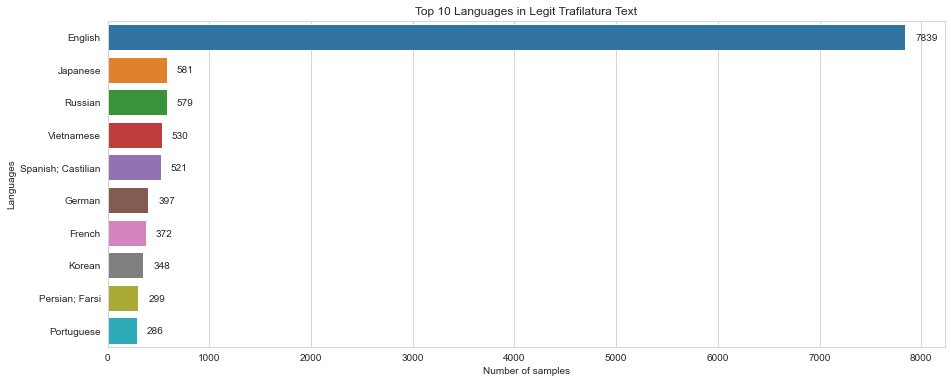

In [39]:
langs = trafilatura_langs_legit[:10].index
values = trafilatura_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit Trafilatura Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [40]:
BeautifulSoup_langs_legit = legit_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_legit[:10]

English               7876
Japanese               588
Russian                581
Vietnamese             549
Spanish; Castilian     526
German                 385
French                 379
Korean                 366
Persian; Farsi         301
Portuguese             270
Name: BeautifulSoup_text_language, dtype: int64

In [41]:
print('The total number of legitimate languages (BS): ', len(BeautifulSoup_langs_legit))

The total number of legitimate languages (BS):  52


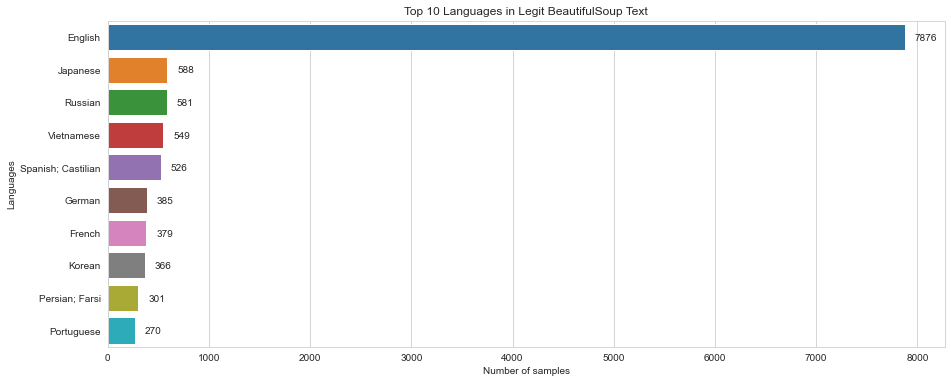

In [42]:
langs = BeautifulSoup_langs_legit[:10].index
values = BeautifulSoup_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit BeautifulSoup Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [43]:
html_langs_legit = legit_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_legit[:10]

English                          14215
Catalan; Valencian                 130
French                              41
Estonian                            33
Spanish; Castilian                  31
Romanian; Moldavian; Moldovan       25
Italian                             15
Turkish                             10
Persian; Farsi                      10
Portuguese                           9
Name: html_text_language, dtype: int64

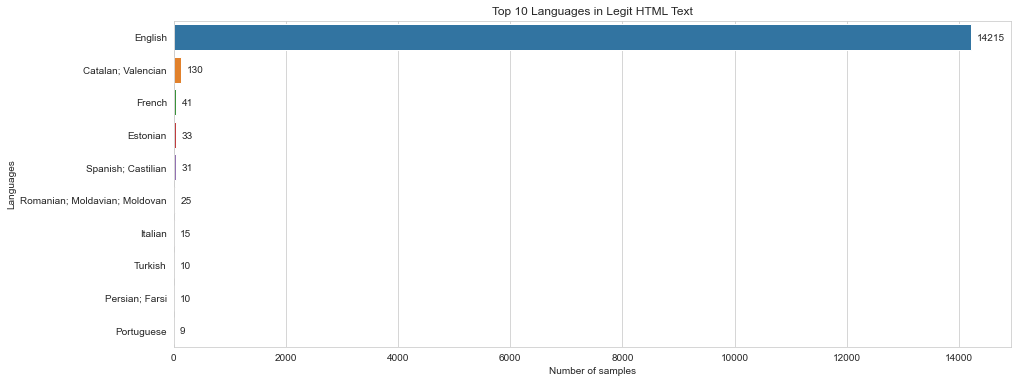

In [44]:
langs = html_langs_legit[:10].index
values = html_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='66' /> 
<h2>2.6 SSL Distribution</h2>

In [45]:
legit_samples.SSL.value_counts()

False    14999
Name: SSL, dtype: int64

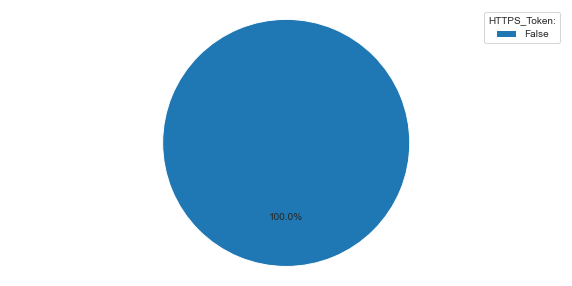

In [46]:
# Plot the categories of the disease column
sizes = legit_samples.SSL.value_counts().values #sizes of the slides
labels= legit_samples.SSL.value_counts().index #labels with the diseases names
fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='77' /> 
<h2>2.7 Top 10 TLD & Domains</h2>

In [47]:
legit_samples.Domain.value_counts()[:10]

google            123
uol                29
tmall              25
tripadvisor        18
olx                17
ebay               15
amazon             13
groupon            11
huffingtonpost     11
zalando            10
Name: Domain, dtype: int64

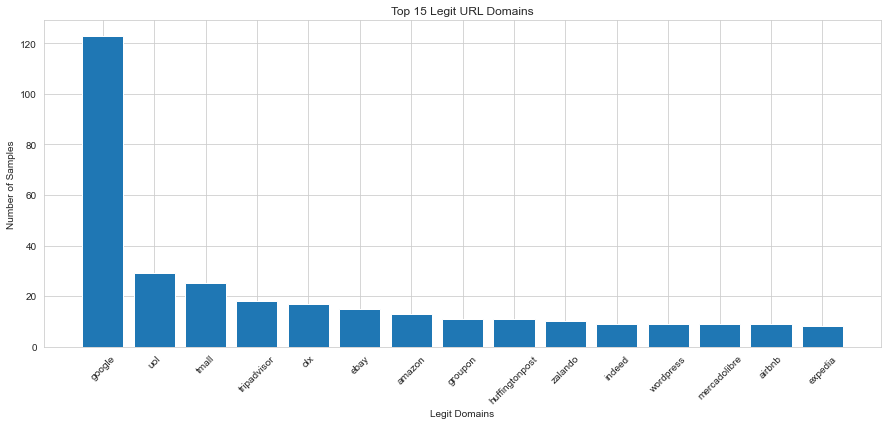

In [48]:
domains = legit_samples.Domain.value_counts()[:15].index
counts = legit_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Legit Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [49]:
legit_samples.TLD.value_counts()[:10]

com       8478
net        744
ru         499
org        462
de         281
jp         259
edu        168
fr         163
com.br     150
it         148
Name: TLD, dtype: int64

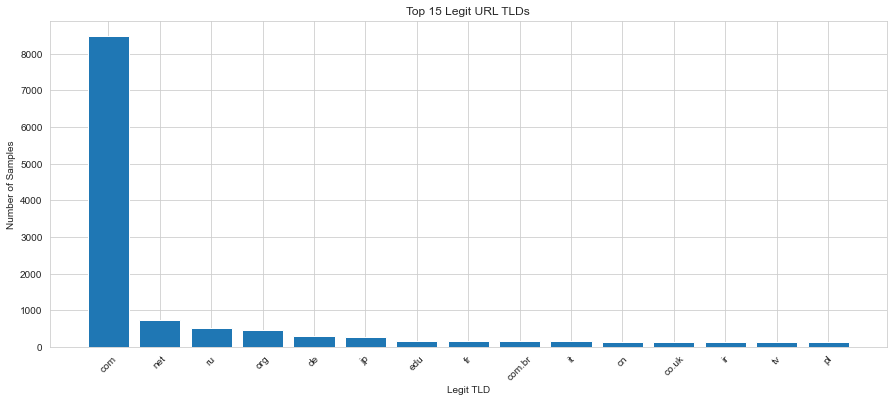

In [50]:
tlds = legit_samples.TLD.value_counts()[:15].index
counts = legit_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Legit TLD")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='88' /> 
<h2>2.8 URL Length Stats</h2>

In [51]:
print('Legit URL average length:', round(legit_samples.URL.str.len().sum()/sum(legit_samples.URL.notnull()), 4))
print('Legit URL min length:', legit_samples.URL.str.len().min())
print('Legit URL max length:', legit_samples.URL.str.len().max())
print('Legit URL median length:', legit_samples.URL.str.len().median())

Legit URL average length: 12.1347
Legit URL min length: 4.0
Legit URL max length: 35.0
Legit URL median length: 12.0


<hr></hr>

<a id='99' /> 
<h2>2.9 Top 10 FLD & Subdomains</h2>

In [52]:
legit_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
0,juiceads.net,net,juiceads,juiceads.net,None
1,theoldreader.com,com,theoldreader,theoldreader.com,None
2,hkepc.com,com,hkepc,hkepc.com,None
3,runetki.tv,tv,runetki,runetki.tv,None
4,fluege.de,de,fluege,fluege.de,None
5,khaosod.co.th,co.th,khaosod,khaosod.co.th,None
6,baoku.com,com,baoku,baoku.com,None
7,miltt.com,com,miltt,miltt.com,None
8,wileyplus.com,com,wileyplus,wileyplus.com,None
9,paypal.de,de,paypal,paypal.de,None


In [53]:
print('the number of unique fld:', len(legit_samples.FLD.unique()))
legit_samples.FLD.value_counts()[:15]

the number of unique fld: 14911


uol.com.br         29
tmall.com          25
go.com              8
wordpress.com       8
livejournal.com     6
free.fr             6
wix.com             5
ipage.com           3
ucoz.ua             2
ucoz.com            2
jimdo.com           2
163.com             2
squarespace.com     2
ning.com            2
mturk.com           1
Name: FLD, dtype: int64

In [54]:
print('the number of unique subdomains:', len(legit_samples.Subdomain.unique()))
legit_samples.Subdomain.value_counts()[:15]

the number of unique subdomains: 98


espn            2
subscribe       2
ru              1
watsons         1
noticiasdatv    1
pensador        1
list            1
mobile          1
batepapo        1
onlainfilm      1
xpg             1
vip             1
mail            1
adidas          1
abcnews         1
Name: Subdomain, dtype: int64

In [55]:
legit_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,14999,14998,14998,14998,99
unique,14999,368,13944,14910,97
top,juiceads.net,com,google,uol.com.br,espn
freq,1,8478,123,29,2
